In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns # For enhanced visualisatons


#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
#  Change File Path to use on main data file.
file_path = 'csv\cleaned_csv\pp-complete_cleaned_data.csv' 
#  Change File Path to use on main data file.
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Col names for reference:
# "transaction_id", "price", "date_of_transfer","postcode", "property_type", "old_new", "duration", "paon", "saon", "street", "locality", "town_city", "district", "county", "ppd_category_type", "record_status"
cols_needed = ["price", "date_of_transfer", "town_city"]

# Import csv into df, remove the header as it's actually a row of data, set column names & add an index.
df = pd.read_csv(file_path, usecols=cols_needed) # Consider chunking to break down data while reading 

# clean date time
df['date_of_transfer'] = pd.to_datetime(df['date_of_transfer'], errors='coerce') # turn date into datetime value

In [2]:
# Remove Gatwick from Data as its all commercial property (airport hotels) & Filtering out Thornhill as it looks like just one farm sale, commercial again:
df = df[(df['town_city'] != 'GATWICK') & (df['town_city'] != 'THORNHILL')]

In [3]:
df_o1 = df.copy()

In [4]:
# Add a Year Col, then using the year col add an year average price column
average_type = 'mean'
df_o1['year_of_transfer'] = df_o1['date_of_transfer'].dt.year # add a column with just the year for agg purposes. dt.year gives me an int. dt.strftime('%Y') gives a string
df_o1['year_avg_sale'] = df_o1.groupby('year_of_transfer')['price'].transform(average_type)

average_type = average_type.capitalize() # for the title of the graph

In [5]:
df_plot = df_o1.sort_values('year_of_transfer').copy()

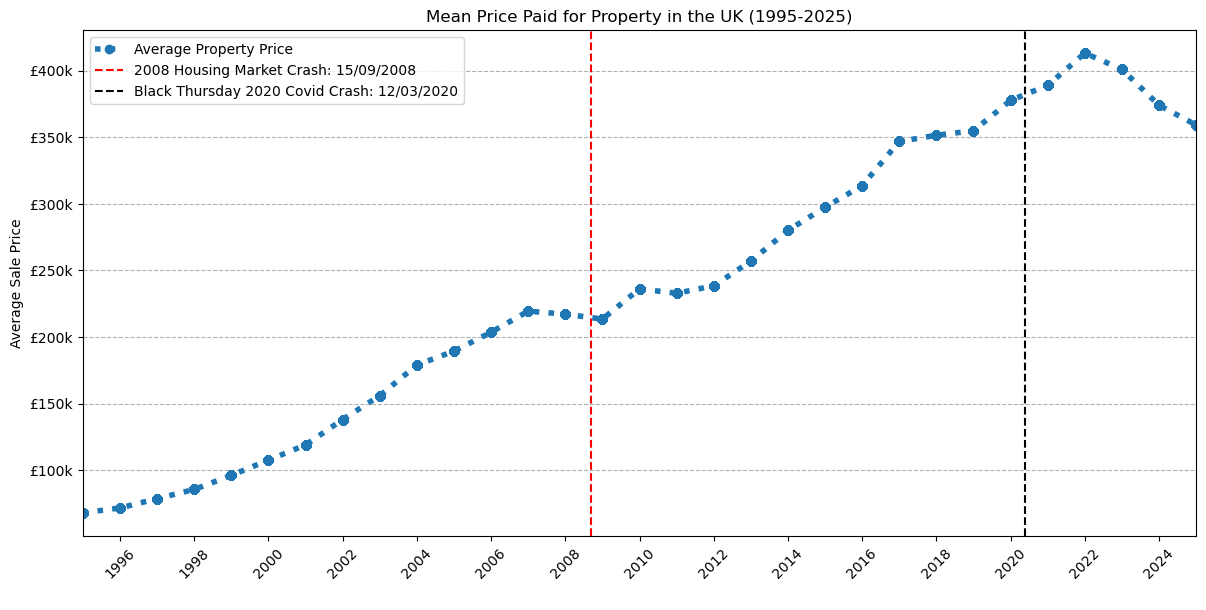

In [6]:
fig, ax = plt.subplots()



df_plot.plot(
    kind='line',
    linewidth=4, 
    linestyle=':',
    marker='o',
    markersize=6,
    x='year_of_transfer', 
    y='year_avg_sale', 
    label="Average Property Price",
    figsize=(12,6), 
    ax=ax)

house_crash_date = pd.to_datetime('2008-09-15') # 2008 great reccession started on 15/09/2008
covid_crash_date = pd.to_datetime('2020-03-12') # black thursday covid 19 market crash

house_crash_line = ax.axvline(house_crash_date.year + 0.7, color='red', linestyle='--', linewidth=1.5)
covid_line = ax.axvline(covid_crash_date.year + 0.393, color='black', linestyle='--', linewidth=1.5)
house_line = ax.get_lines()[0]

house_crash_date = pd.to_datetime('2008-09-15') # 2008 great reccession started on 15/09/2008
covid_crash_date = pd.to_datetime('2020-03-12') # black thursday covid 19 market crash

ax.legend(
    [house_line, house_crash_line, covid_line],
    ['Average Property Price', f'2008 Housing Market Crash: 15/09/2008', f'Black Thursday 2020 Covid Crash: 12/03/2020'],
    loc='upper left'
)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}k')) # Formats the Y ticks to £100k etc
plt.locator_params(axis='x', nbins=19) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle="--") #Grid & linestyle of grid.
plt.xlim(1995, 2025)
plt.xlabel('   ')
plt.ylabel('Average Sale Price')
plt.title(f'{average_type} Price Paid for Property in the UK (1995-2025)')

plt.show()

#### To get an idea of how volume has changes over the years - i will plot number of sales per year:

In [7]:
df_o2 = df.copy()
df_o2['year_of_transfer'] = df_o2['date_of_transfer'].dt.year # add a column with just the year for agg purposes. dt.year gives me an int. dt.strftime('%Y') gives a string

In [8]:
df_o2_pivot = df_o2.pivot_table(
    values='price',
    index='year_of_transfer',
    aggfunc='count'
    )
df_o2_pivot = df_o2_pivot.rename(columns={'price': 'Volume'})

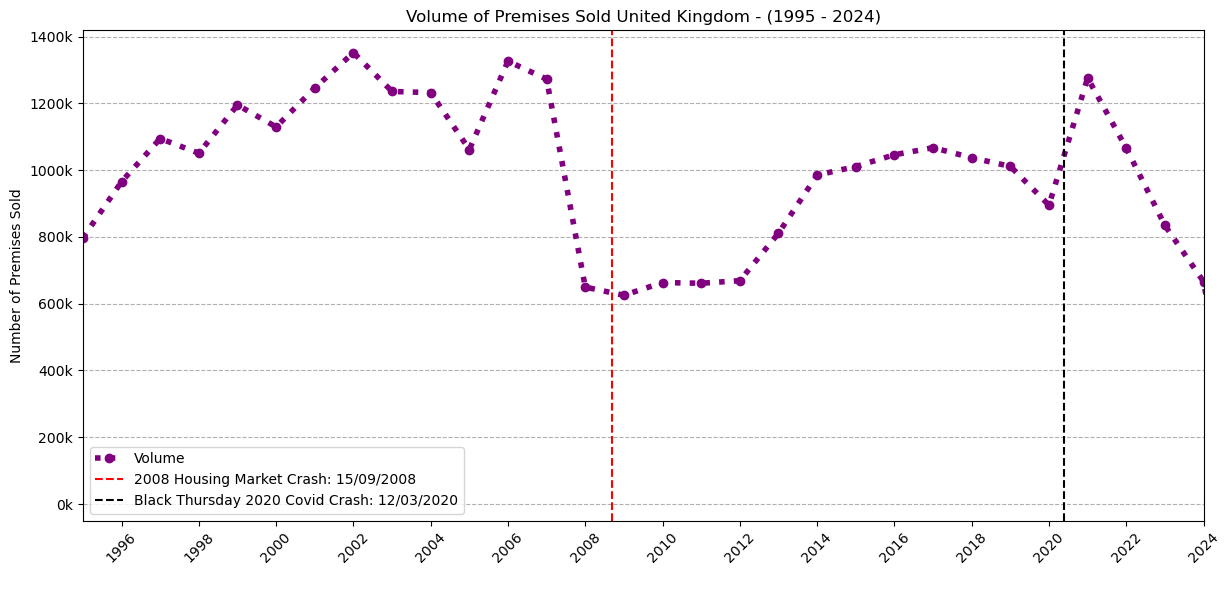

In [9]:
fig, ax = plt.subplots()

df_o2_pivot.plot(
    kind='line',
    linewidth=4, 
    linestyle=':',
    color='purple',
    marker='o',
    markersize=6,
    label='Volume',
    figsize=(12,6), 
    ax=ax)


house_crash_line = ax.axvline(house_crash_date.year + 0.7, color='red', linestyle='--', linewidth=1.5)
covid_line = ax.axvline(covid_crash_date.year + 0.393, color='black', linestyle='--', linewidth=1.5)
volume_line = ax.get_lines()[0]

house_crash_date = pd.to_datetime('2008-09-15') # 2008 great reccession started on 15/09/2008
covid_crash_date = pd.to_datetime('2020-03-12') # black thursday covid 19 market crash

ax.legend(
    [volume_line, house_crash_line, covid_line],
    ['Volume', f'2008 Housing Market Crash: 15/09/2008', f'Black Thursday 2020 Covid Crash: 12/03/2020'],
    loc='lower left'
)

plt.locator_params(axis='x', nbins=19) 
plt.xticks(rotation=45)
plt.xlim(1995, 2024)
plt.tight_layout()
plt.grid(axis='y', linestyle="--") #Grid & linestyle of grid.
plt.ylabel('Number of Premises Sold')
plt.title('Volume of Premises Sold United Kingdom - (1995 - 2024)')
plt.xlabel("    ")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}k'))


plt.show()



#### With both the visualissations, it would be good to view them in a subplot. I will show both to 2024 to keep X-Axis scales the same:

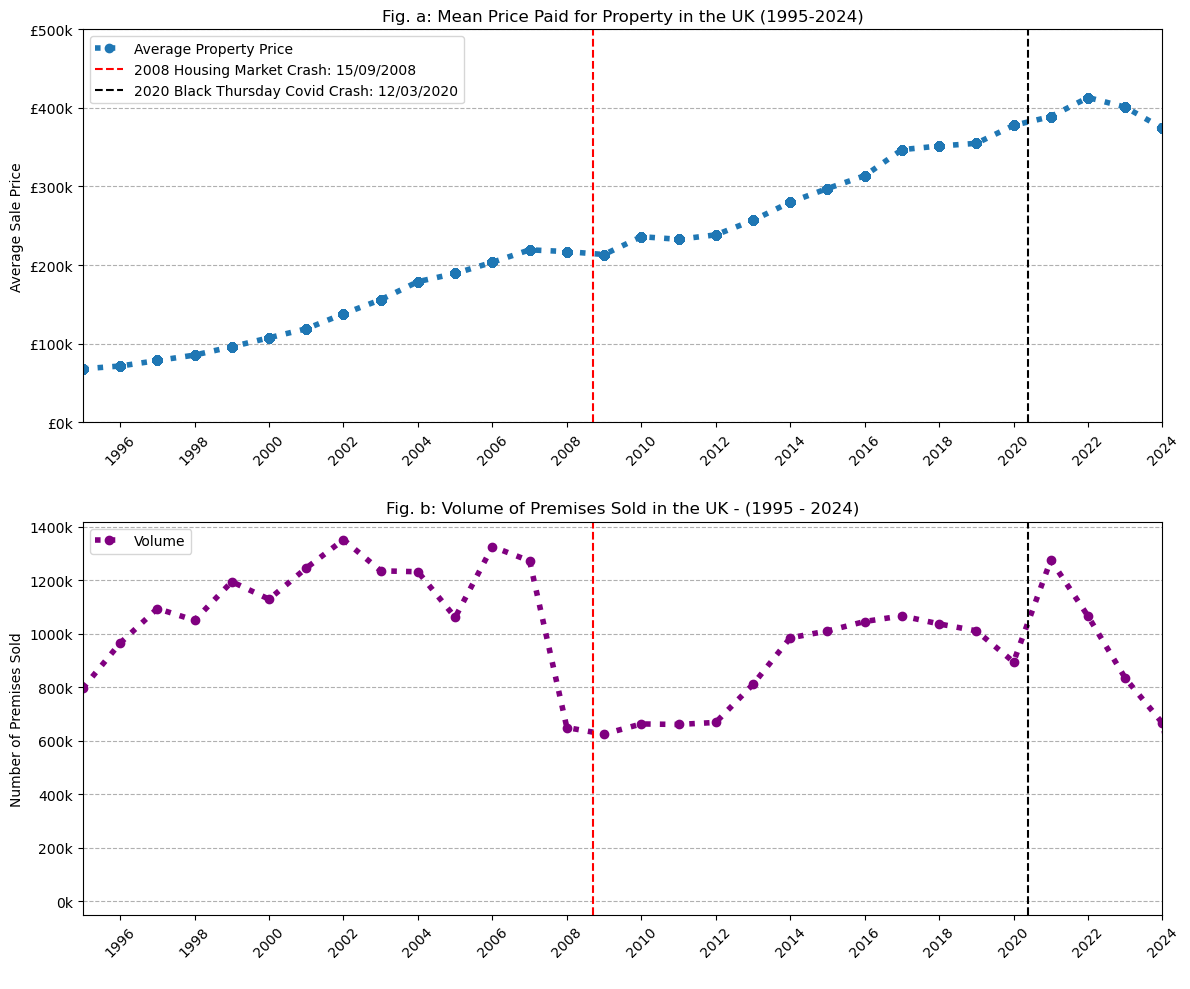

In [10]:
fig, ax = plt.subplots(2,1, figsize=(12,10))

df_plot.plot(
    kind='line',
    linewidth=4, 
    linestyle=':',
    marker='o',
    markersize=6,
    x='year_of_transfer', 
    y='year_avg_sale', 
    label="Average Property Price", 
    ax=ax[0])

house_crash_line = ax[0].axvline(house_crash_date.year + 0.7, color='red', linestyle='--', linewidth=1.5)
covid_line = ax[0].axvline(covid_crash_date.year + 0.393, color='black', linestyle='--', linewidth=1.5)
house_line = ax[0].get_lines()[0]

house_crash_date = pd.to_datetime('2008-09-15') # 2008 great reccession started on 15/09/2008
covid_crash_date = pd.to_datetime('2020-03-12') # black thursday covid 19 market crash

ax[0].legend(
    [house_line, house_crash_line, covid_line],
    ['Average Property Price', f'2008 Housing Market Crash: 15/09/2008', f'2020 Black Thursday Covid Crash: 12/03/2020'],
    loc='upper left'
)
ax[0].set_ylim(0, 500_000)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}k')) # Formats the Y ticks to £100k etc
ax[0].locator_params(axis='x', nbins=19) 
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle="--") #Grid & linestyle of grid.
ax[0].set_xlim(1995, 2024)
ax[0].set_xlabel('   ')
ax[0].set_ylabel('Average Sale Price')
ax[0].set_title(f'Fig. a: {average_type} Price Paid for Property in the UK (1995-2024)')

df_o2_pivot.plot(
    kind='line',
    linewidth=4, 
    linestyle=':',
    color='purple',
    marker='o',
    markersize=6,
    label='Volume', 
    ax=ax[1])

house_crash_line = ax[1].axvline(house_crash_date.year + 0.7, color='red', linestyle='--', linewidth=1.5)
covid_line = ax[1].axvline(covid_crash_date.year + 0.393, color='black', linestyle='--', linewidth=1.5)
house_line = ax[1].get_lines()[1]


ax[1].locator_params(axis='x', nbins=19) 
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlim(1995, 2024)
ax[1].grid(axis='y', linestyle="--") #Grid & linestyle of grid.
ax[1].set_ylabel('Number of Premises Sold')
ax[1].set_title('Fig. b: Volume of Premises Sold in the UK - (1995 - 2024)')
ax[1].set_xlabel("    ")
ax[1].legend(title='', loc='upper left')
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}k'))


fig.tight_layout()
plt.show()


